# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Cloudya Filia Putri
- **Email:** cloudyafilia@gmail.com
- **ID Dicoding:** MC312D5X0660

## Menentukan Pertanyaan Bisnis

1. Pada jam, hari, dan bulan apa saja peminjaman sepeda mencapai titik tertinggi dan terendah selama tahun 2011-2012?
2. Pada musim apa peminjaman sepeda paling banyak dan paling sedikit terjadi sepanjang tahun 2011-2012?
3. Dalam kondisi cuaca seperti apa jumlah peminjaman sepeda mencapai angka tertinggi dan terendah selama tahun 2011-2012?
4. Dari empat faktor cuaca (suhu, suhu terasa, kelembapan, dan kecepatan angin), mana yang memiliki dampak paling signifikan terhadap jumlah peminjaman sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap gathering data, dataset **day.csv** dan **hour.csv** dikonversi ke dalam bentuk **DataFrame** menggunakan **library pandas** untuk mempermudah manipulasi, analisis, dan visualisasi data.

#### Load Day Dataset




In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Hour Dataset

In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap assessing data, kedua DataFrame dievaluasi untuk menilai kesiapan dataset sebelum dilakukan analisis, termasuk pengecekan missing values, inkonsistensi, dan duplikasi.

#### Menilai tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Menganalisis Missing Value

In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


##### Menganalisis Duplikasi Data

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Mengeksplorasi Parameter Statistik

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



**Insight – Tabel Day**  

Dataframe ini tidak memiliki nilai Null dan duplikasi. Namun, terdapat kesalahan tipe data pada kolom 'dteday', yang seharusnya 'date', tetapi tercatat sebagai 'object'. Selain itu, diperlukan perubahan nama beberapa kolom agar lebih jelas dan sesuai dengan isi datanya.

#### Menilai tabel hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Menganalisis Missing Value

In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


##### Menganalisis Duplikasi Data

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Mengeksplorasi Parameter Statistik

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight – Tabel Hour**  

Dataframe ini tidak memiliki nilai Null dan duplikasi. Namun, terdapat kesalahan tipe data pada kolom 'dteday', yang seharusnya 'date', tetapi tercatat sebagai 'object'. Selain itu, diperlukan perubahan nama beberapa kolom agar lebih jelas dan sesuai dengan isi datanya.

### Cleaning Data

Pada tahap cleaning data, kedua dataframe akan dibersihkan dengan mengubah tipe data kolom 'dteday' menjadi 'datetime' untuk memastikan konsistensi data sebelum analisis dan mengganti beberapa nama kolom supaya lebih jelas dan sesuai dengan isi datanya.

#### Membersihkan tabel day_df

##### Mengatasi Kesalahan Tipe Data dteday

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

##### Memperbaiki Judul Kolom

In [13]:
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'hum': 'humidity',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'cnt': 'total_rental',
    'casual': 'casual_users',
    'registered': 'registered_users'
}, inplace=True)

##### Ringkasan Data Setelah Dibersihkan

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   date                 731 non-null    datetime64[ns]
 2   season               731 non-null    int64         
 3   year                 731 non-null    int64         
 4   month                731 non-null    int64         
 5   holiday              731 non-null    int64         
 6   weekday              731 non-null    int64         
 7   workingday           731 non-null    int64         
 8   weathersit           731 non-null    int64         
 9   temperature          731 non-null    float64       
 10  feeling_temperature  731 non-null    float64       
 11  humidity             731 non-null    float64       
 12  windspeed            731 non-null    float64       
 13  casual_users         731 non-null  

##### Menyimpan Data Tabel day_df Hasil Cleaning

In [15]:
# Display cleaned data preview
print("\nCleaned Data Preview:")
print(day_df.head())

# Save cleaned data for further analysis
cleaned_file_path = 'Cleaned_Project IDCamp Bike Sharing (day).csv'
day_df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to: {cleaned_file_path}")


Cleaned Data Preview:
   instant       date  season  year  month  holiday  weekday  workingday  \
0        1 2011-01-01       1     0      1        0        6           0   
1        2 2011-01-02       1     0      1        0        0           0   
2        3 2011-01-03       1     0      1        0        1           1   
3        4 2011-01-04       1     0      1        0        2           1   
4        5 2011-01-05       1     0      1        0        3           1   

   weathersit  temperature  feeling_temperature  humidity  windspeed  \
0           2     0.344167             0.363625  0.805833   0.160446   
1           2     0.363478             0.353739  0.696087   0.248539   
2           1     0.196364             0.189405  0.437273   0.248309   
3           1     0.200000             0.212122  0.590435   0.160296   
4           1     0.226957             0.229270  0.436957   0.186900   

   casual_users  registered_users  total_rental  
0           331               654    

#### Membersihkan tabel hour_df

##### Menganatasi Kesalahan Tipe Data dteday

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

##### Memperbaiki Judul Kolom

In [17]:
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'hum': 'humidity',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'cnt': 'total_rental',
    'casual': 'casual_users',
    'registered': 'registered_users'
}, inplace=True)

##### Ringkasan Data Setelah Dibersihkan

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              17379 non-null  int64         
 1   date                 17379 non-null  datetime64[ns]
 2   season               17379 non-null  int64         
 3   year                 17379 non-null  int64         
 4   month                17379 non-null  int64         
 5   hour                 17379 non-null  int64         
 6   holiday              17379 non-null  int64         
 7   weekday              17379 non-null  int64         
 8   workingday           17379 non-null  int64         
 9   weathersit           17379 non-null  int64         
 10  temperature          17379 non-null  float64       
 11  feeling_temperature  17379 non-null  float64       
 12  humidity             17379 non-null  float64       
 13  windspeed            17379 non-

##### Menyimpan Data Tabel hour_df Hasil Cleaning

In [19]:
# Display cleaned data preview
print("\nCleaned Data Preview:")
print(hour_df.head())

# Save cleaned data for further analysis
cleaned_file_path = 'Cleaned_Project IDCamp Bike Sharing (hour).csv'
hour_df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to: {cleaned_file_path}")


Cleaned Data Preview:
   instant       date  season  year  month  hour  holiday  weekday  \
0        1 2011-01-01       1     0      1     0        0        6   
1        2 2011-01-01       1     0      1     1        0        6   
2        3 2011-01-01       1     0      1     2        0        6   
3        4 2011-01-01       1     0      1     3        0        6   
4        5 2011-01-01       1     0      1     4        0        6   

   workingday  weathersit  temperature  feeling_temperature  humidity  \
0           0           1         0.24               0.2879      0.81   
1           0           1         0.22               0.2727      0.80   
2           0           1         0.22               0.2727      0.80   
3           0           1         0.24               0.2879      0.75   
4           0           1         0.24               0.2879      0.75   

   windspeed  casual_users  registered_users  total_rental  
0        0.0             3                13            

**Insight:**

Setelah melakukan cleaning data untuk kedua tabel (day_df dan hour_df) dengan mengubah tipe data kolom 'dteday' menjadi 'datetime' dan mengganti beberapa nama kolom supaya lebih jelas dan sesuai dengan isi datanya, maka data sudah siap untuk dieksplorasi dan dianalisis.

## Exploratory Data Analysis (EDA)

Pada tahap Exploratory Data Analysis (EDA), dataframe yang telah dibersihkan akan dieksplorasi lebih lanjut untuk memahami pola dan karakteristik data.

In [20]:
day_df.describe(include='all')

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual_users,registered_users,total_rental
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight**:

Berdasarkan data peminjaman sepeda dari tahun 2011 hingga 2012, jumlah peminjaman paling sedikit dalam satu hari adalah **22 peminjaman**, sementara jumlah peminjaman tertinggi dalam satu hari mencapai **8714 peminjaman**, dengan rata-rata peminjaman sepeda per hari mencapai **4504 peminjaman**. Tren peminjaman juga menunjukkan variasi berdasarkan hari dan bulan, di mana peminjaman cenderung lebih tinggi pada hari kerja dibandingkan hari libur serta meningkat pada musim tertentu dengan kondisi cuaca yang lebih mendukung.

In [21]:
hour_df.describe(include='all')

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual_users,registered_users,total_rental
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight**:

Berdasarkan data peminjaman sepeda per jam dari tahun 2011 hingga 2012, jumlah peminjaman paling sedikit dalam satu jam adalah **1 peminjaman**, sementara jumlah peminjaman tertinggi dalam satu jam mencapai **977 peminjaman**. Rata-rata peminjaman sepeda per jam tercatat sekitar **189 peminjaman**, dengan jumlah peminjaman yang lebih tinggi pada jam-jam sibuk dan hari kerja, serta dipengaruhi oleh faktor musim dan kondisi cuaca.

### Explore Best & Worst Performing Time Periods

In [22]:
# --- 1. Rata-rata Jumlah Peminjaman per Jam ---

hour_df.groupby(by="hour").agg({
    "total_rental": ["max", "min", "mean", "std"]
})

total_rental                            
              max min        mean         std
hour                                         
0             283   2   53.898072   42.307910
1             168   1   33.375691   33.538727
2             132   1   22.869930   26.578642
3              79   1   11.727403   13.239190
4              28   1    6.352941    4.143818
5              66   1   19.889819   13.200765
6             213   1   76.044138   55.084348
7             596   1  212.064649  161.441936
8             839   5  359.011004  235.189285
9             426  14  219.309491   93.703458
10            539   8  173.668501  102.205413
11            663  10  208.143054  127.495536
12            776   3  253.315934  145.081134
13            760  11  253.661180  148.107657
14            750  12  240.949246  147.271574
15            750   7  251.233196  144.632541
16            783  11  311.983562  148.682618
17            976  15  461.452055  232.656611
18            977  23  425.510989  224.639304
19            743  11  311.523352  161.050359
20            567  11  226.030220  119.670164
21            584   6  172.314560   89.788893
22            502   9  131.335165   69.937782
23            256   2   87.831044   50.846889

**Insight**:

Berdasarkan tabel di atas, rata-rata peminjaman sepeda tertinggi terjadi pada pukul **17.00**, **18.00**, dan **19.00**. Sebaliknya, rata-rata peminjaman sepeda terendah terjadi pada pukul **03.00**, **04.00**, dan **05.00**. Pola ini menunjukkan bahwa peminjaman sepeda cenderung meningkat pada sore hingga malam hari, kemungkinan karena banyak orang pulang kerja atau beraktivitas, sementara peminjaman menurun drastis pada dini hari ketika aktivitas masyarakat lebih sedikit.

In [23]:
# --- 2. Rata-rata Jumlah Peminjaman per Hari ---

day_df.groupby(by="weekday").agg({
    "total_rental": ["max", "min", "mean", "std"]
})

total_rental                                
                 max   min         mean          std
weekday                                             
0               8227   605  4228.828571  1872.496629
1               7525    22  4338.123810  1793.074013
2               7767   683  4510.663462  1826.911642
3               8173   441  4548.538462  2038.095884
4               7804   431  4667.259615  1939.433317
5               8362  1167  4690.288462  1874.624870
6               8714   627  4550.542857  2196.693009

**Insight**:

 Berdasarkan tabel di atas, rata-rata peminjaman sepeda tertinggi terjadi pada **hari Jumat**, yaitu sebanyak 4690,29 Sebaliknya, rata-rata peminjaman terendah terjadi pada **hari Minggu** sebanyak 4338,12. Pola ini menunjukkan bahwa peminjaman sepeda cenderung meningkat pada hari kerja menjelang akhir pekan, terutama Kamis dan Jumat, kemungkinan karena orang-orang lebih banyak beraktivitas di luar menjelang akhir pekan. Sementara itu, peminjaman menurun pada hari Minggu, mungkin karena sebagian besar masyarakat lebih memilih beristirahat di rumah setelah beraktivitas selama seminggu.

In [24]:
# --- 3. Rata-rata Jumlah Peminjaman per Bulan ---

day_df.groupby(by="month").agg({
    "total_rental": ["max", "min", "mean", "std"]
})

total_rental                                
               max   min         mean          std
month                                             
1             4521   431  2176.338710  1161.674370
2             5062  1005  2655.298246  1145.313307
3             8362   605  3692.258065  1899.301812
4             7460   795  4484.900000  1776.160778
5             8294  2633  5349.774194  1298.711561
6             8120  3767  5772.366667  1240.400031
7             8173  3285  5563.677419  1273.751871
8             7865  1115  5664.419355  1494.516146
9             8714  1842  5766.516667  1810.130649
10            8156    22  5199.225806  1988.392517
11            6852  1495  4247.183333  1285.712709
12            6606   441  3403.806452  1549.639353

**Insight**:

Berdasarkan tabel di atas, rata-rata peminjaman sepeda tertinggi terjadi pada **bulan Juni**, **Agustus**, dan **September**. Sebaliknya, rata-rata peminjaman sepeda terendah terjadi pada **bulan Januari**, **Februari**, dan **Desember**. Pola ini menunjukkan bahwa peminjaman sepeda cenderung meningkat pada pertengahan tahun hingga awal musim gugur (Juni–September), yang kemungkinan disebabkan oleh kondisi cuaca yang lebih mendukung untuk bersepeda. Sebaliknya, peminjaman menurun pada awal tahun dan akhir tahun (Januari, Februari, dan Desember), yang bisa jadi karena kondisi cuaca yang lebih dingin dan kurang mendukung untuk aktivitas luar ruangan.

### Explore Season Impact on Bike Rentals

In [25]:
# --- 1. Penggunaan Pelanggan Berdasarkan Musim ---

day_df.groupby(by="season").agg({
    "date": "nunique",
    "total_rental": ["max", "min", "mean", "std"]
})

date total_rental                                
       nunique          max   min         mean          std
season                                                     
1          181         7836   431  2604.132597  1399.942119
2          184         8362   795  4992.331522  1695.977235
3          188         8714  1115  5644.303191  1459.800381
4          178         8555    22  4728.162921  1699.615261

**Insight**:

Berdasarkan tabel di atas, rata-rata peminjaman sepeda tertinggi terjadi pada **musim gugur (3)**, diikuti oleh musim panas (2) dan musim dingin (4). Sementara itu, rata-rata peminjaman sepeda terendah terjadi pada **musim semi (1)**. Pola ini menunjukkan bahwa peminjaman sepeda cenderung meningkat selama musim gugur, kemungkinan karena kondisi cuaca yang lebih nyaman untuk bersepeda. Sebaliknya, peminjaman menurun drastis pada musim semi, yang mungkin disebabkan oleh faktor cuaca atau perubahan pola aktivitas masyarakat pada musim tersebut.

### Explore Weather Impact on Bike Rentals

In [26]:
# --- 2. Penggunaan Pelanggan Berdasarkan Kondisi Cuaca ---

hour_df.groupby(by="weathersit").agg({
    "date": "nunique",
    "total_rental": ["max", "min", "mean", "std"]
})


date total_rental                            
           nunique          max min        mean         std
weathersit                                                 
1              700          977   1  204.869272  189.487773
2              567          957   1  175.165493  165.431589
3              300          891   1  111.579281  133.781045
4                3          164  23   74.333333   77.925178

**Insight**:

Berdasarkan tabel di atas, rata-rata peminjaman sepeda tertinggi terjadi pada kondisi cuaca **cerah atau berawan sebagian (1)**. Sementara itu, rata-rata peminjaman sepeda terendah terjadi pada kondisi **hujan deras, badai petir, atau salju lebat (4)**. Pola ini menunjukkan bahwa peminjaman sepeda cenderung lebih tinggi saat cuaca cerah, sedangkan hujan deras dan salju lebat menghambat aktivitas bersepeda secara signifikan.

### Exploring Weather Factors on Bike Rentals

In [71]:
# --- Pengaruh Faktor Cuaca terhadap Peminjaman Sepeda ---

hour_df.groupby(by="weathersit").agg({
    "temperature": ["max", "min", "mean", "std"],
    "feeling_temperature": ["max", "min", "mean", "std"],
    "humidity": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
    "total_rental": ["max", "min", "mean", "std"]
})

temperature                           feeling_temperature          \
                   max   min      mean       std                 max     min   
weathersit                                                                     
1                 1.00  0.02  0.511054  0.200775              1.0000  0.0000   
2                 0.96  0.02  0.474445  0.175933              0.8939  0.0000   
3                 0.92  0.08  0.456688  0.160509              0.8939  0.0455   
4                 0.22  0.14  0.186667  0.041633              0.2273  0.1364   

                               humidity                           windspeed  \
                mean       std      max   min      mean       std       max   
weathersit                                                                    
1           0.488387  0.178958     1.00  0.08  0.573747  0.178463    0.8060   
2           0.456591  0.157263     1.00  0.00  0.698807  0.172478    0.7164   
3           0.436386  0.144079     1.00  0.00  0.827632  0.157370    0.8507   
4           0.186900  0.046284     0.93  0.86  0.883333  0.040415    0.3284   

                                       total_rental                  \
               min      mean       std          max min        mean   
weathersit                                                            
1           0.0000  0.190553  0.123788          977   1  204.869272   
2           0.0000  0.179973  0.114463          957   1  175.165493   
3           0.0000  0.218825  0.130198          891   1  111.579281   
4           0.0896  0.204000  0.119714          164  23   74.333333   

                        
                   std  
weathersit              
1           189.487773  
2           165.431589  
3           133.781045  
4            77.925178

**Insight:**

Berdasarkan tabel di atas, rata-rata peminjaman sepeda tertinggi terjadi pada kondisi **cerah atau berawan sebagian (1)** dengan rata-rata **204,87 sepeda**, sedangkan peminjaman terendah terjadi pada kondisi **hujan deras, badai petir, atau salju lebat (4)** dengan rata-rata hanya **74,33 sepeda**. Suhu (Temp) dan suhu terasa (Atemp) menunjukkan tren positif terhadap peminjaman, di mana cuaca yang lebih hangat cenderung meningkatkan jumlah peminjaman. Sebaliknya, kelembapan dan kecepatan angin yang lebih tinggi pada kondisi cuaca buruk tampaknya menjadi faktor yang menghambat aktivitas bersepeda. Hal ini menunjukkan bahwa peminjaman sepeda lebih optimal saat cuaca cerah hingga berawan, sementara hujan deras atau badai mengurangi peminjaman secara signifikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam, hari, dan bulan apa saja peminjaman sepeda mencapai titik tertinggi dan terendah selama tahun 2011-2012?

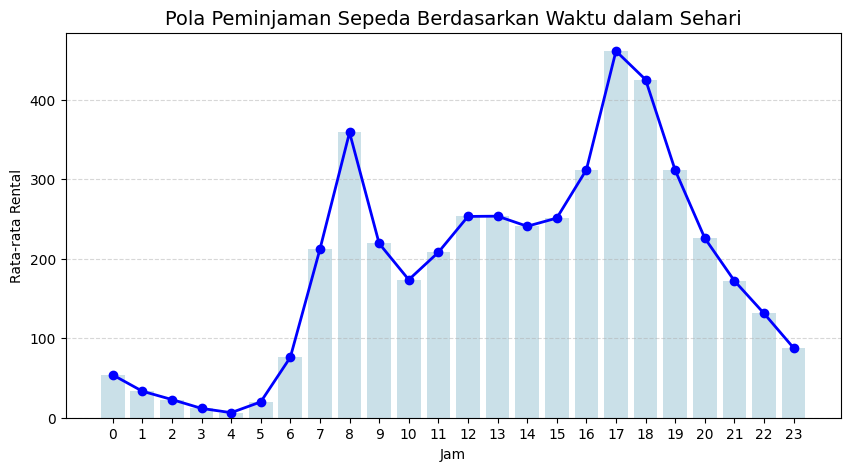

In [28]:
# --- 1. Visualisasi Tren Peminjaman Sepeda per Jam ---

plt.figure(figsize=(10, 5))
bar_color = "lightblue"
line_color = "blue"
hourly_rentals = hour_df.groupby('hour')['total_rental'].mean().reset_index()
hourly_rentals.rename(columns={'total_rental': 'average_rentals'}, inplace=True)
ax = sns.barplot(x='hour', y='average_rentals', data=hourly_rentals, color=bar_color, alpha=0.7)
bar_positions = np.arange(len(hourly_rentals))
plt.plot(bar_positions, hourly_rentals['average_rentals'], marker='o', linewidth=2, color=line_color)
plt.title("Pola Peminjaman Sepeda Berdasarkan Waktu dalam Sehari", fontsize=14)
plt.xlabel("Jam")
plt.ylabel("Rata-rata Rental")
plt.xticks(ticks=bar_positions, labels=hourly_rentals['hour'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


**Insight:**

Tren peminjaman sepeda menunjukkan dua puncak utama, yaitu pada pukul **8 pagi** dan **5 sore**, yang kemungkinan besar terkait dengan jam berangkat dan pulang kerja. Sementara itu, peminjaman cenderung rendah pada dini hari, terutama antara pukul **2-5 pagi**, ketika aktivitas masyarakat minim.

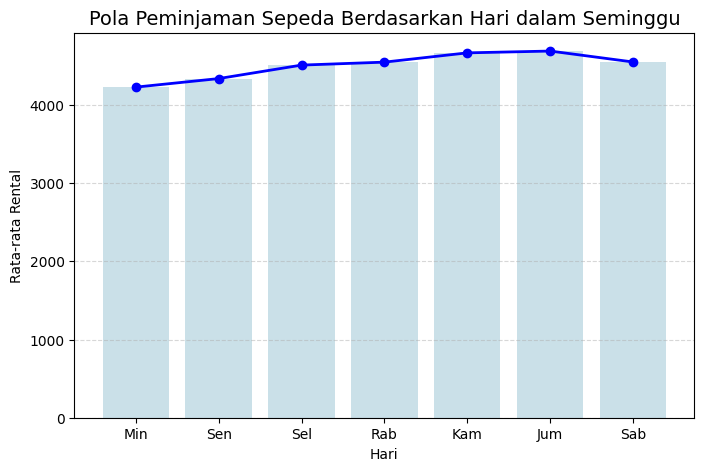

In [29]:
# --- 2. Visualisasi Tren Peminjaman Sepeda per Hari ---

plt.figure(figsize=(8, 5))
bar_color = "lightblue"
line_color = "blue"
weekly_rentals = day_df.groupby('weekday')['total_rental'].mean().reset_index()
weekly_rentals.rename(columns={'total_rental': 'average_rentals_daily'}, inplace=True)
ax = sns.barplot(x='weekday', y='average_rentals_daily', data=weekly_rentals, color=bar_color, alpha=0.7)
bar_positions = np.arange(len(weekly_rentals))
plt.plot(bar_positions, weekly_rentals['average_rentals_daily'], marker='o', linewidth=2, color=line_color)
plt.title("Pola Peminjaman Sepeda Berdasarkan Hari dalam Seminggu", fontsize=14)
plt.xlabel("Hari")
plt.ylabel("Rata-rata Rental")
plt.xticks(ticks=bar_positions, labels=['Min', 'Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Insight:**

Grafik menunjukkan peminjaman sepeda stabil sepanjang minggu, dengan puncaknya pada hari **Jumat dan Sabtu**, sementara hari **Minggu** sedikit menurun. Peningkatan di akhir pekan kemungkinan karena lebih banyak aktivitas rekreasi, sedangkan penurunan pada hari Minggu bisa disebabkan oleh berkurangnya mobilitas. Meski demikian, perbedaannya tidak signifikan, menunjukkan penggunaan yang konsisten setiap hari.

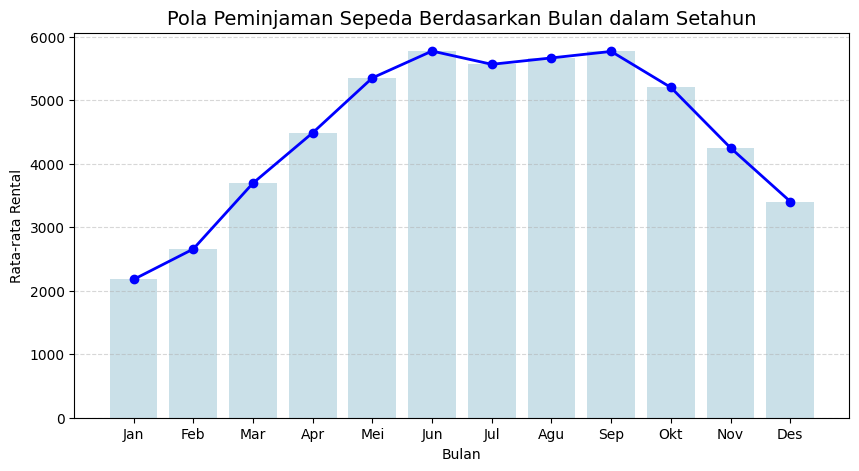

In [30]:
# --- 3. Visualisasi Tren Peminjaman Sepeda per Bulan ---

monthly_rentals = day_df.groupby('month')['total_rental'].mean().reset_index()
monthly_rentals.rename(columns={'total_rental': 'average_rentals_daily'}, inplace=True)
monthly_rentals = monthly_rentals.sort_values(by='month')
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='average_rentals_daily', data=monthly_rentals, color='lightblue', alpha=0.7)
plt.plot(monthly_rentals['month'] - 1,
         monthly_rentals['average_rentals_daily'],
         color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title("Pola Peminjaman Sepeda Berdasarkan Bulan dalam Setahun", fontsize=14)
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Rental")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Insight:**

Grafik menunjukkan bahwa peminjaman sepeda mencapai puncaknya pada bulan Juni hingga September, dengan jumlah tertinggi di **bulan Juni**. Sebaliknya, jumlah peminjaman terendah terjadi pada bulan **Januari** dan Desember. Tren ini kemungkinan dipengaruhi oleh perubahan musim, di mana bulan-bulan dengan cuaca lebih hangat cenderung meningkatkan aktivitas luar ruangan, sementara musim dingin mengurangi penggunaan sepeda.

### Pertanyaan 2: Pada musim apa peminjaman sepeda paling banyak dan paling sedikit terjadi sepanjang tahun 2011-2012?

<ipython-input-31-be638c163425>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_rental", y="season", data=df, palette=colors)


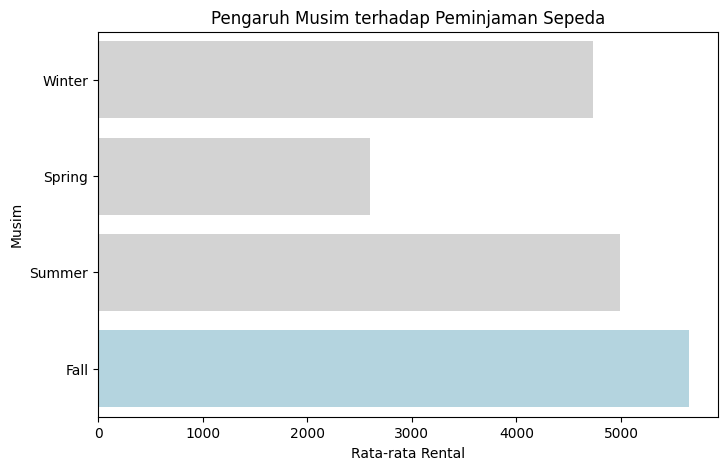

In [31]:
# --- 1. Visualisasi Pola Penggunaan Pelanggan Berdasarkan Musim --

season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df = day_df.groupby("season")["total_rental"].mean().reset_index()
df["season"] = df["season"].map(season_mapping)
season_order = ["Winter", "Spring", "Summer", "Fall"]
df["season"] = pd.Categorical(df["season"], categories=season_order, ordered=True)
df = df.sort_values(by="total_rental", ascending=True)
colors = ["lightgrey" if season != "Fall" else "lightblue" for season in df["season"]]
plt.figure(figsize=(8, 5))
sns.barplot(x="total_rental", y="season", data=df, palette=colors)
plt.title("Pengaruh Musim terhadap Peminjaman Sepeda")
plt.xlabel("Rata-rata Rental")
plt.ylabel("Musim")
plt.show()


**Insight:**

Berdasarkan grafik di atas, peminjaman sepeda cenderung paling tinggi pada musim gugur (**Fall**) dibandingkan dengan musim lainnya, menunjukkan bahwa kondisi cuaca pada musim ini mungkin lebih mendukung aktivitas bersepeda. Sementara itu, peminjaman sepeda paling rendah terjadi pada musim semi (**Spring**), yang mungkin disebabkan oleh kondisi cuaca yang kurang optimal atau faktor lain seperti intensitas hujan yang lebih tinggi.

### Pertanyaan 3: Dalam kondisi cuaca seperti apa jumlah peminjaman sepeda mencapai angka tertinggi dan terendah selama tahun 2011-2012?

<ipython-input-32-b012dc94bae4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_rental", y="weathersit", data=df, palette=colors)


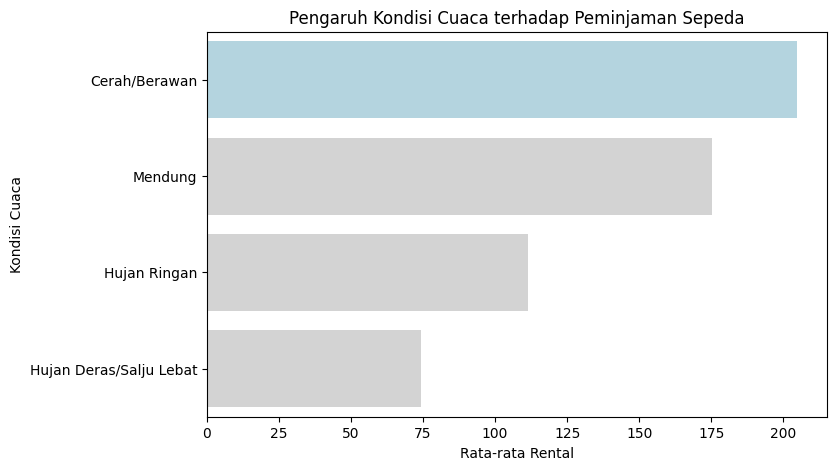

In [32]:
# --- 2. Visualisasi Pola Penggunaan Pelanggan Berdasarkan Cuaca --

weather_mapping = {
    1: "Cerah/Berawan",
    2: "Mendung",
    3: "Hujan Ringan",
    4: "Hujan Deras/Salju Lebat"
}
df = hour_df.groupby("weathersit")["total_rental"].mean().reset_index()
df["weathersit"] = df["weathersit"].map(weather_mapping)
weather_order = ["Cerah/Berawan", "Mendung", "Hujan Ringan", "Hujan Deras/Salju Lebat"]
df["weathersit"] = pd.Categorical(df["weathersit"], categories=weather_order, ordered=True)
colors = ["lightgrey" if condition != "Cerah/Berawan" else "lightblue" for condition in df["weathersit"]]
plt.figure(figsize=(8, 5))
sns.barplot(x="total_rental", y="weathersit", data=df, palette=colors)
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda")
plt.xlabel("Rata-rata Rental")
plt.ylabel("Kondisi Cuaca")
plt.show()

**Insight:**

Peminjaman sepeda tertinggi terjadi pada **cuaca cerah atau berawan**, sementara peminjaman menurun saat kondisi cuaca memburuk. Cuaca mendung masih memungkinkan jumlah peminjaman yang cukup tinggi, tetapi saat hujan ringan terjadi penurunan signifikan. Peminjaman terendah terjadi pada kondisi **hujan deras atau salju lebat**, menunjukkan bahwa cuaca ekstrem berdampak besar pada aktivitas bersepeda.

 ### Pertanyaan 4: Dari empat faktor cuaca (suhu, suhu terasa, kelembapan, dan kecepatan angin), mana yang memiliki dampak paling signifikan terhadap jumlah peminjaman sepeda?

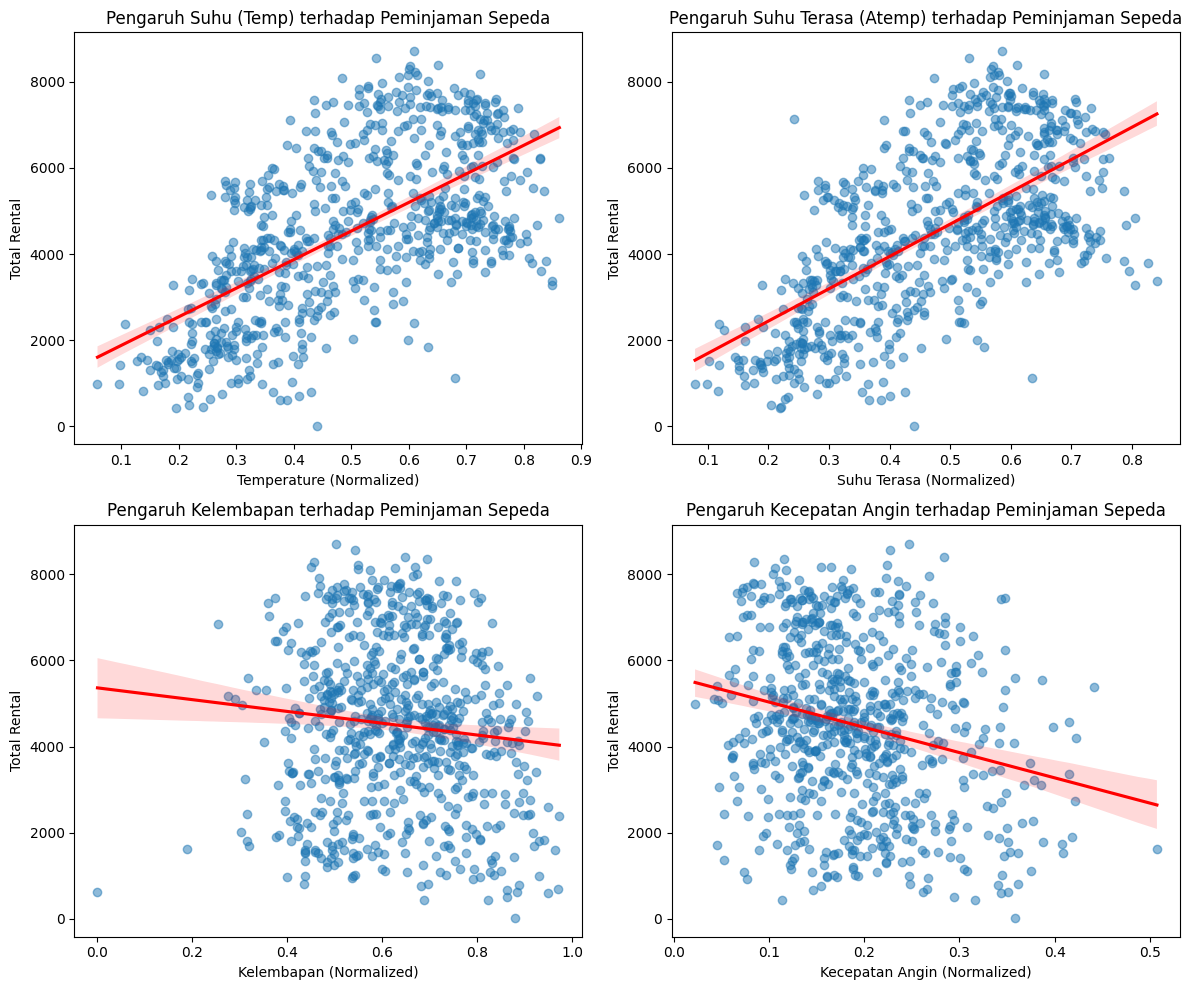

In [34]:
# --- Visualisasi Hubungan suhu, suhu terasa, kelembapan, dan kecepatan angin terhadap total rental ---

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot Temp vs CNT
sns.regplot(x=day_df['temperature'], y=day_df['total_rental'], ax=axes[0, 0], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
axes[0, 0].set_title("Pengaruh Suhu (Temp) terhadap Peminjaman Sepeda")
axes[0, 0].set_xlabel("Temperature (Normalized)")
axes[0, 0].set_ylabel("Total Rental")

# Scatter plot Atemp vs CNT
sns.regplot(x=day_df['feeling_temperature'], y=day_df['total_rental'], ax=axes[0, 1], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
axes[0, 1].set_title("Pengaruh Suhu Terasa (Atemp) terhadap Peminjaman Sepeda")
axes[0, 1].set_xlabel("Suhu Terasa (Normalized)")
axes[0, 1].set_ylabel("Total Rental")

# Scatter plot Humidity vs CNT
sns.regplot(x=day_df['humidity'], y=day_df['total_rental'], ax=axes[1, 0], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
axes[1, 0].set_title("Pengaruh Kelembapan terhadap Peminjaman Sepeda")
axes[1, 0].set_xlabel("Kelembapan (Normalized)")
axes[1, 0].set_ylabel("Total Rental")

# Scatter plot Wind Speed vs CNT
sns.regplot(x=day_df['windspeed'], y=day_df['total_rental'], ax=axes[1, 1], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
axes[1, 1].set_title("Pengaruh Kecepatan Angin terhadap Peminjaman Sepeda")
axes[1, 1].set_xlabel("Kecepatan Angin (Normalized)")
axes[1, 1].set_ylabel("Total Rental")

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**

Grafik tersebut menunjukkan bahwa **suhu (Temp) dan suhu terasa (Atemp) merupakan faktor cuaca yang paling berpengaruh terhadap total peminjaman sepeda**, terlihat dari pola sebaran titik yang membentuk hubungan linear positif yang jelas, dengan garis regresi merah menunjukkan korelasi positif yang cukup kuat. Peminjaman sepeda menunjukkan pola yang dipengaruhi oleh faktor cuaca. **Suhu (Temp) dan suhu terasa (Atemp) memiliki korelasi positif** dengan jumlah peminjaman, artinya semakin tinggi suhu, semakin banyak sepeda yang dipinjam, kemungkinan karena cuaca hangat lebih nyaman untuk bersepeda. Sebaliknya, **kelembapan dan kecepatan angin memiliki korelasi negatif**, di mana peningkatan kelembapan dan angin kencang justru menurunkan jumlah peminjaman. Hal ini bisa terjadi karena kondisi lembap atau berangin membuat bersepeda menjadi kurang nyaman atau lebih sulit.

## Analisis Lanjutan (Opsional)

 ### Analisis Clustering dengan Manual Grouping: Pola Peminjaman Sepeda berdasarkan Jenis Pengguna dan Waktu

In [61]:
# --- Clustering Pola Peminjaman Sepeda Berdasarkan Jenis Pengguna dan Waktu ---

rental_user_clustering = hour_df.groupby(['weekday', 'hour'])[['total_rental', 'casual_users', 'registered_users']].sum().unstack()
print(rental_user_clustering)

        total_rental                                                           \
hour              0     1     2     3    4     5      6      7      8      9    
weekday                                                                         
0               9775  8053  6286  3239  955   852   1493   3476   8805  16437   
1               3571  1800  1021   496  567  2252   8930  25848  42868  22718   
2               2790  1254   687   382  508  2470  10863  30569  48122  24118   
3               3594  1595   797   484  477  2678  11212  31614  50786  24807   
4               4045  1774   934   497  528  2669  11066  31388  50323  24810   
5               5453  2571  1325   673  589  2486   9363  26450  48077  26935   
6               9902  7117  5302  2403  804   854   2205   4826  12020  19613   

         ... registered_users                                            \
hour     ...               14     15     16     17     18     19     20   
weekday  ...                           

**Insight:**

Peminjaman sepeda oleh pengguna terdaftar (registered users) meningkat tajam pada jam sibuk **(07:00 - 09:00 dan 17:00 - 19:00)**, menunjukkan pola penggunaan untuk perjalanan kerja atau kuliah. Sementara itu, pengguna casual lebih aktif pada **siang hingga sore hari (10:00 - 16:00), terutama di akhir pekan**, mengindikasikan penggunaan untuk rekreasi. Pola ini menunjukkan bahwa peminjaman sepeda dipengaruhi oleh jenis pengguna dan waktu dalam sehari.

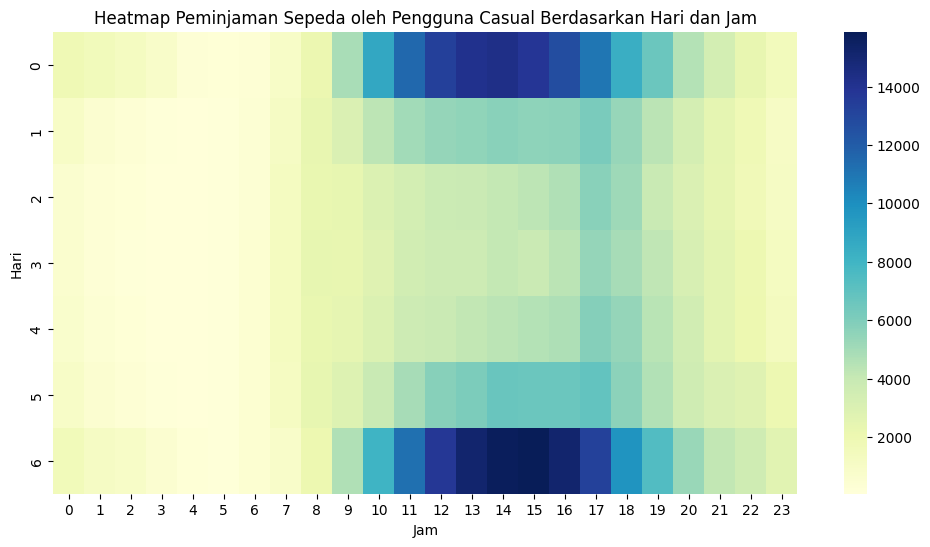

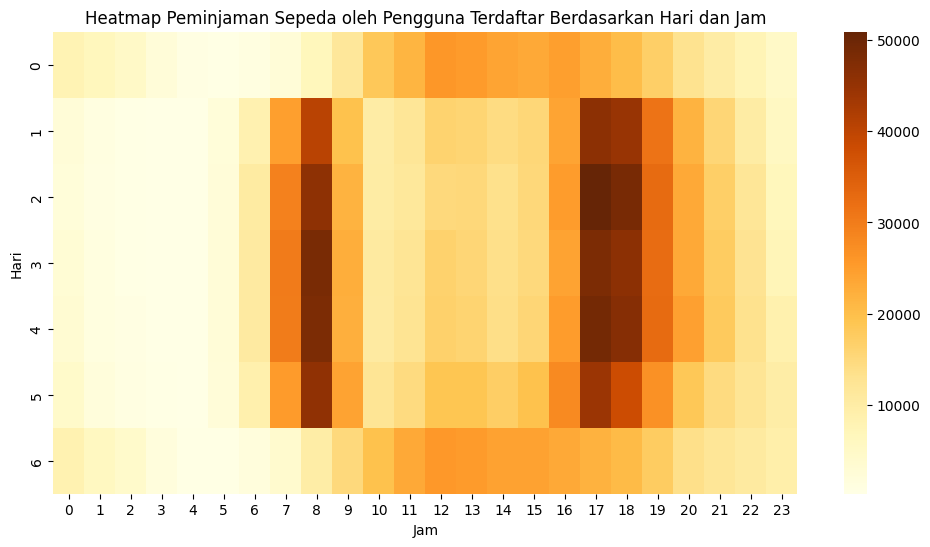

In [66]:
# --- Visualisasi Clustering Pola Peminjaman Sepeda Berdasarkan Jenis Pengguna dan Waktu ---

pivot_data_casual = rental_user_clustering['casual_users']
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data_casual, cmap="YlGnBu", annot=False)
plt.title("Heatmap Peminjaman Sepeda oleh Pengguna Casual Berdasarkan Hari dan Jam")
plt.xlabel("Jam")
plt.ylabel("Hari")
plt.show()
pivot_data_registered = rental_user_clustering['registered_users']
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data_registered, cmap="YlOrBr", annot=False)
plt.title("Heatmap Peminjaman Sepeda oleh Pengguna Terdaftar Berdasarkan Hari dan Jam")
plt.xlabel("Jam")
plt.ylabel("Hari")
plt.show()


Insight:

1. Heatmap berwarna biru menunjukkan bahwa **pengguna casual** cenderung meminjam sepeda pada **siang hingga sore hari**, terutama antara **pukul 10:00 hingga 17:00**, dengan puncaknya terjadi sekitar pukul **12:00 - 15:00**. Pola ini berbeda dengan pengguna terdaftar yang lebih aktif pada jam sibuk kerja. Aktivitas pengguna casual juga lebih tinggi pada **akhir pekan (hari ke-6/7)**, menunjukkan bahwa mereka lebih banyak menggunakan sepeda untuk rekreasi atau kegiatan santai dibandingkan untuk transportasi harian.
2. Heatmap berwarna oranye menunjukkan bahwa pengguna **terdaftar (registered users)** cenderung meminjam sepeda pada jam sibuk, yaitu **sekitar pukul 07:00 - 09:00 pagi dan 17:00 - 19:00 sore**. Pola ini konsisten di hampir semua hari dalam seminggu, menunjukkan bahwa pengguna terdaftar kemungkinan besar adalah pekerja atau mahasiswa yang menggunakan sepeda sebagai moda transportasi harian. Sementara itu, peminjaman pada tengah malam hingga dini hari sangat rendah, menandakan bahwa sepeda jarang digunakan oleh pengguna terdaftar di luar jam kerja atau aktivitas rutin.

## Conclusion

### **1. Pada jam, hari, dan bulan apa saja peminjaman sepeda mencapai titik tertinggi dan terendah selama tahun 2011-2012?**

  Peminjaman sepeda mencapai puncaknya pada sore hingga malam hari, terutama sekitar pukul 17.00-19.00, menunjukkan tingginya penggunaan setelah jam kerja atau sekolah. Secara harian, tren peminjaman relatif stabil sepanjang minggu, dengan sedikit peningkatan pada Jumat dan Sabtu. Secara bulanan, puncak peminjaman terjadi pada musim panas, khususnya di bulan Juni hingga September, sementara titik terendah terjadi pada bulan Desember dan Januari.

### **2. Pada musim apa peminjaman sepeda paling banyak dan paling sedikit terjadi sepanjang tahun 2011-2012?**

  Berdasarkan data peminjaman sepeda selama tahun 2011-2012, musim gugur (fall) mencatat jumlah peminjaman tertinggi, sedangkan musim semi (spring) memiliki jumlah peminjaman terendah. Kemungkinan besar, cuaca yang lebih stabil dan suhu yang nyaman di musim gugur mendorong lebih banyak orang untuk menggunakan sepeda. Sebaliknya, musim semi mungkin memiliki lebih sedikit peminjaman karena kondisi cuaca yang masih tidak menentu, dengan kemungkinan hujan lebih tinggi atau suhu yang belum optimal untuk bersepeda.
  
### **3. Dalam kondisi cuaca seperti apa jumlah peminjaman sepeda mencapai angka tertinggi dan terendah selama tahun 2011-2012?**

  Berdasarkan data peminjaman sepeda selama tahun 2011-2012, jumlah peminjaman tertinggi terjadi saat cuaca cerah atau berawan, sedangkan peminjaman terendah terjadi saat hujan deras atau salju lebat. Kondisi cuaca yang baik cenderung meningkatkan aktivitas luar ruangan, termasuk bersepeda, sementara cuaca ekstrem seperti hujan deras atau salju lebat menghambat mobilitas pengguna sepeda secara signifikan.

### **4. Dari empat faktor cuaca (suhu, suhu terasa, kelembapan, dan kecepatan angin), mana yang memiliki dampak paling signifikan terhadap jumlah peminjaman sepeda?**

  Suhu (Temp) dan suhu terasa (Atemp) merupakan faktor yang paling signifikan memengaruhi jumlah peminjaman sepeda. Kedua faktor ini menunjukkan korelasi positif yang kuat dengan jumlah peminjaman, artinya semakin hangat cuaca, semakin banyak sepeda yang dipinjam. Pola ini juga terlihat jelas pada grafik scatter, di mana sebaran data membentuk hubungan linear positif dengan garis regresi yang cukup kuat. Sebaliknya, kelembapan dan kecepatan angin berdampak negatif, di mana peningkatan kedua faktor ini justru menurunkan jumlah peminjaman, kemungkinan karena kondisi lembap atau berangin membuat bersepeda menjadi kurang nyaman. Dengan demikian, meskipun keempat faktor cuaca memiliki pengaruh terhadap peminjaman sepeda, suhu dan suhu terasa menjadi faktor utama yang menentukan tingkat penggunaan sepeda karena kondisi cuaca yang lebih hangat lebih mendukung aktivitas bersepeda.